Time stuff
==========

Text(0, 0.5, 'time')

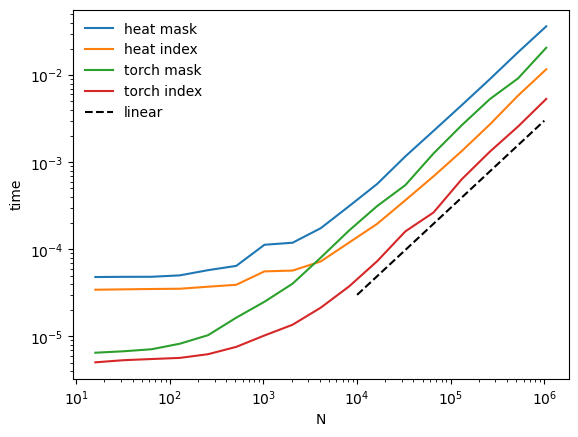

In [1]:
import heat as ht
from time import perf_counter
import matplotlib.pyplot as plt

shape = (8, 4)

def get_indices(shape):
    return ht.arange(shape[0]//2) 

def get_mask(shape):
    mask = ht.zeros(shape=shape).astype(bool)
    mask[:shape[0]//2, :] = True
    return mask

def time_indexing(shape):
    data = ht.random.rand(*shape)
    indices = get_indices(shape)
    mask = get_mask(shape)

    t0 = perf_counter()
    me = data[mask]
    t1 = perf_counter()
    time_mask = t1 - t0

    t0 = perf_counter()
    me = data[indices, :]
    t1 = perf_counter()
    time_index = t1 - t0

    data = ht.random.rand(*shape).larray
    indices = get_indices(shape).larray
    mask = get_mask(shape).larray

    t0 = perf_counter()
    me = data[mask]
    t1 = perf_counter()
    time_mask_torch = t1 - t0

    t0 = perf_counter()
    me = data[indices, :]
    t1 = perf_counter()
    time_index_torch = t1 - t0

    return {'heat mask': time_mask, 'heat index': time_index, 'torch mask': time_mask_torch, 'torch index': time_index_torch}

shapes = [(2**i, 4) for i in range(4, 21)]

results = []
for _ in range(9):
    time_indexing(shapes[0])
for shape in shapes:
    results.append(time_indexing(shape))

for label in results[0].keys():
    plt.loglog([me[0] for me in shapes], [me[label] for me in results], label=label)
plt.loglog([1e4, 1e6], [3e-5, 3e-3], color='black', label='linear', ls='--')
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('time')

We have three main findings:
- Indexing scales linearly ones the data exceeds a certain size.
- Indexing with index arrays is faster than with masks
- Indexing with heat is $\approx 2\times$ slower than with torch

Let's repeat this exercise with 2D data

Text(0, 0.5, 'time')

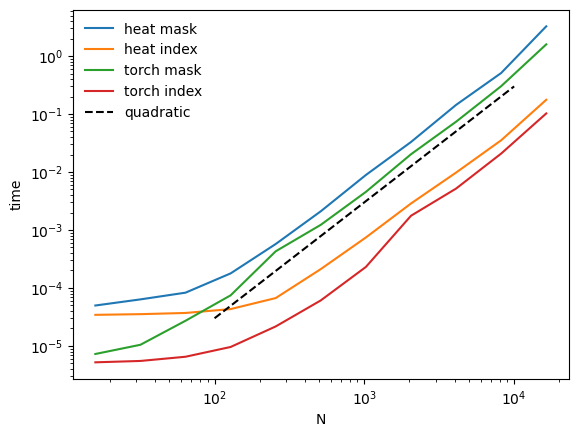

In [2]:
plt.cla()
shapes = [(2**i, 2**i) for i in range(4, 15)]

results = []
for _ in range(9):
    time_indexing(shapes[0])
for shape in shapes:
    results.append(time_indexing(shape))

for label in results[0].keys():
    plt.loglog([me[0] for me in shapes], [me[label] for me in results], label=label)
plt.loglog([1e2, 1e4], [3e-5, 3e-1], color='black', label='quadratic', ls='--')
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('time')

Indeed, the scaling is now quadratic

In [3]:
if __name__ == '__main__':
    plt.show()